In [210]:
import numpy as np
import matplotlib.pyplot as plt
import csv 

In [211]:
filepath='/Housing Price data set.csv'

# **Storing the value**

In [212]:
price=[]
area=[]
bedroom=[]
bathroom=[]
count=0
with open(filepath, mode ='r') as file:     
   csvFile = csv.reader(file) 
   for lines in csvFile:
     if count==0:
       count=count+1
       continue
     price.append(int(float(lines[1])))
     area.append(int(lines[2]))
     bedroom.append(int(lines[3]))
     bathroom.append(int(lines[4]))

In [213]:
m= len(price)
n=4
X1=np.array(area)
X2=np.array(bedroom)
X3=np.array(bathroom)
Y=np.array(price)
X0=np.ones(m,dtype=int)

# **Training data**

In [214]:
X=[]
for i  in range(m):
  col=[]
  col.append(X0[i])
  col.append(X1[i])
  col.append(X2[i])
  col.append(X3[i])
  X.append(col)
X=np.array(X)
# X=np.array([X0,X1,X2,X3])
# print(X)
# print(X.shape)


# **LWR Algorithm**

In [215]:
def weight_matrix(X,input_x,tawo):
  m=len(X)
  wei= np.zeros((m, m))
  for i in range(m):
    diff = X[i]-input_x
    wei[i][i]=np.exp((float(-1/2) * np.dot(diff.T, diff))/(tawo*tawo))

  return wei

In [224]:
def LWR_algorithm(X,Y,weight):
  iteration=10000
  learning_rate=0.0000001
  theta=np.ones(X[0].size,dtype=float)
  # print(theta)
  m=len(X)
  for i in range(iteration):
    predi=np.dot(X,theta)-Y
    grad=learning_rate*(1.0/m)*np.dot(np.dot(X.T,weight),predi)
    theta=theta-grad

  theta=np.array(theta)
  return theta

Actual Price for [1,8250,3,1]] : 59900
 
Tawo    Predicted Price
0.1     59266.66666666657
0.4     59753.56741180414
0.6     61855.252836561056
0.8     63732.982570189124
2     66934.06286380702
 
As tawo value decrease , the prediction gets better.
The value predicted using LWR algorithm gives best predicted value as compared normalization using gradient descent algo or mini batch algo,



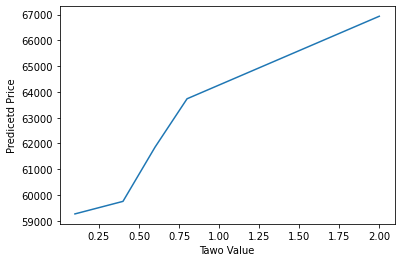

In [228]:
input_x=[1,8250,3,1]

tawo=[0.1,0.4,0.6,0.8,2]
predicted_price=[]
for i in range(len(tawo)):
  weight=weight_matrix(X,input_x,tawo[i])
  LWR_theta=LWR_algorithm(X,Y,weight)
  predicted_price.append(np.dot(np.transpose(input_x), LWR_theta))
print("Actual Price for [1,8250,3,1]] : 59900")
print(" ")
print("Tawo    Predicted Price")
for i in range(len(tawo)):
  print(str(tawo[i])+"     " + str(predicted_price[i]))

plt.ylabel('Predicetd Price')
plt.xlabel('Tawo Value') 
plt.plot(tawo,predicted_price)
print(" ")
print("As tawo value decrease , the prediction gets better.")
print("The value predicted using LWR algorithm gives best predicted value as compared normalization using gradient descent algo or mini batch algo,")
print("")

# **Comparison**

In [229]:
error_lwr_algo=(abs(59900-predicted_price[0])*100)/59900
# print(error_lwr_algo)

# from question no  6a  the % error prediction was calculated 
error_without_regulari=18.64542413597011
error_with_regulari=18.55689437129676

# from question no  6b  the % error prediction was calculated for batch_gda, stocha_gda,mini_batch_gda
error_batch_gda=30.229953002026335
error_stochastic_gda=30.025839363465924
error_mini_batch=47.159202904283795

#from question no 6c the% error prediction was calculated for bacth_gda,stochastics_gda,mini_bacth_gda with and without regularization
error_batch_gda_regul=30.277880568027697
error_stochastic_gda_regul=29.98230067697708
error_mini_batch_gda_regul=47.51233426715228

In [230]:
print("Comparison")
print(" ")
print("Algorithm Name                      %error")
print("")
print("error_lwr_algo             "+"    "+ str(error_lwr_algo))
print("error_without_regulari     "+"    "+str(error_without_regulari))
print("error_with_regulari        "+"    "+str(error_with_regulari))
print("error_batch_gda            "+"    "+str(error_batch_gda))
print("error_stochastic_gda       "+"    "+str(error_stochastic_gda))
print("error_mini_batch           "+"    "+str(error_mini_batch))
print("error_batch_gda_regul      "+"    "+str(error_batch_gda_regul))
print("error_stochastic_gda_regul "+"    "+str(error_stochastic_gda_regul))
print("error_mini_batch_gda_regul "+"    "+str(error_mini_batch_gda_regul))

Comparison
 
Algorithm Name                      %error

error_lwr_algo                 1.0573177518087318
error_without_regulari         18.64542413597011
error_with_regulari            18.55689437129676
error_batch_gda                30.229953002026335
error_stochastic_gda           30.025839363465924
error_mini_batch               47.159202904283795
error_batch_gda_regul          30.277880568027697
error_stochastic_gda_regul     29.98230067697708
error_mini_batch_gda_regul     47.51233426715228
